In [154]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [155]:
loan_data = pd.read_csv('loan.csv')
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Data Exploration

In [156]:
loan_data.shape

(614, 13)

In [157]:
loan_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [158]:
loan_data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [159]:
loan_data = loan_data.dropna()
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [160]:
loan_data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [161]:
loan_data.duplicated().sum()

0

In [162]:
loan_data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [163]:
loan_data['Loan_Status'].value_counts()

Y    332
N    148
Name: Loan_Status, dtype: int64

In [164]:
loan_data.loc[:, 'Loan_Status'].replace({'Y': 1, 'N': 0}, inplace=True)

In [165]:
loan_data['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [166]:
# Changing 3+ into 4

loan_data = loan_data.replace(to_replace='3+', value=4)

In [167]:
loan_data['Dependents'].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

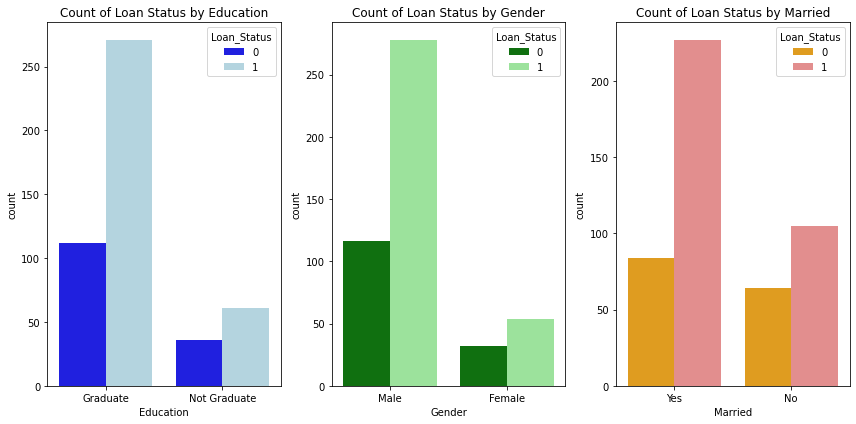

In [168]:
# Let's see some variables on the graph

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 6))

sns.countplot(x='Education', hue='Loan_Status', data=loan_data, ax=axes[0], palette=['blue', 'lightblue'])
axes[0].set_title('Count of Loan Status by Education')

sns.countplot(x='Gender', hue='Loan_Status', data=loan_data, ax=axes[1], palette=['green', 'lightgreen'])
axes[1].set_title('Count of Loan Status by Gender')

sns.countplot(x='Married', hue='Loan_Status', data=loan_data, ax=axes[2], palette=['orange', 'lightcoral'])
axes[2].set_title('Count of Loan Status by Married')

plt.tight_layout()
plt.show()

In [169]:
# Convert categorical columns to numerical values
loan_data.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                      'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

In [170]:
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


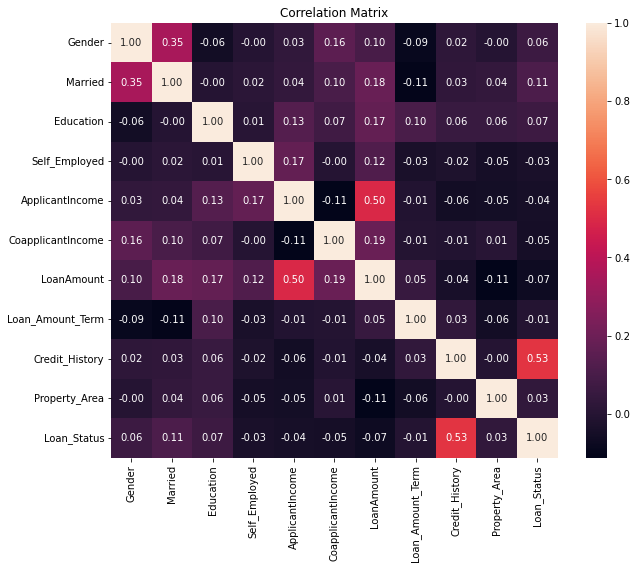

In [171]:
correlation_matrix = loan_data.corr()

# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [172]:
# Droping Loan_ID column 

loan_data = loan_data.drop(columns='Loan_ID', axis = 1)
loan_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


## Choosing the best model

In [173]:
from imblearn.over_sampling import RandomOverSampler

In [174]:
# Balancing unbalanced classes by random repetition 'oversampling'

over_sampler=RandomOverSampler(sampling_strategy=0.8)
X=loan_data.drop('Loan_Status',axis=1).values
y=loan_data['Loan_Status'].values
X_sampled,y_sampled=over_sampler.fit_resample(X,y)

Using NumPy arrays instead of DataFrames can be useful in some cases, especially when working with some machine learning models that take NumPy arrays as input.

In [175]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler((-1,1))
X=scaler.fit_transform(X_sampled)
y=y_sampled

Since I will be using some models that are sensitive to scaling, let's scale the data using MinMAxScaler

In [176]:
# Setting parametrs for our models

model_parametrs = {
    'KNeighborsClassifier': {
        'n_neighbors': [3, 5, 7, 10, 15],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    },
    'LogisticRegression': {
        'C': [0.001, 0.01, 0.1, 1, 10],
        'penalty': ['l1', 'l2']
    },
    'SVC': {
        'C': [0.01, 0.1, 1, 10, 100],
        'kernel': ['linear', 'rbf']
    },
    'DecisionTreeClassifier': {
        'max_depth': [None, 10, 20, 30, 40, 50],
        'min_samples_split': [2, 5, 10]
    },
    'RandomForestClassifier': {
        'n_estimators': [50, 100, 150, 200],
        'max_depth': [None, 10, 20, 30]
    },
    'GradientBoostingClassifier': {
        'n_estimators': [50, 100, 150, 200],
        'learning_rate': [0.01, 0.1, 0.5]
    },
    'AdaBoostClassifier': {
        'n_estimators': [50, 100, 150, 200],
        'learning_rate': [0.01, 0.1, 0.5]
    },
    'XGBClassifier': {
        'learning_rate': [0.01, 0.1, 0.5, 1],
        'n_estimators': [50, 100, 150, 200]
    },
    'CatBoostClassifier': {
        'learning_rate': [0.01, 0.1, 0.5, 1],
        'n_estimators': [50, 100, 150, 200]
    },
    'LGBMClassifier': {
        'learning_rate': [0.01, 0.1, 0.5, 1],
        'n_estimators': [50, 100, 150, 200]
    }
}

In [177]:
# Set models 

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier, KernelDensity
from sklearn.linear_model import LogisticRegression

models = {
    'KNeighborsClassifier' : KNeighborsClassifier(),
    'LogisticRegression' : LogisticRegression(),
    'SVC' : SVC(),
    'DecisionTreeClassifier' : DecisionTreeClassifier(),
    'RandomForestClassifier' : RandomForestClassifier(),
    'GradientBoostingClassifier' : GradientBoostingClassifier(),
    'AdaBoostClassifier' : AdaBoostClassifier(),
    'XGBClassifier' : XGBClassifier(),
    'CatBoostClassifier' : CatBoostClassifier(silent = True), #the model will not display any messages or information about the training progress on the screen
    'LGBMClassifier': LGBMClassifier()
}

In [ ]:
from sklearn.model_selection import GridSearchCV

models_list =list()
for model_name, model in models.items():
    print(f"Searching for {model_name}")
    param_grid = model_parametrs[model_name]
    grid_search = GridSearchCV(model, param_grid, cv=4, scoring='accuracy')
    grid_search.fit(X,y)
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    best_accuracy = grid_search.best_score_
    
    models_list.append({'Model': model_name, 'Best Params': best_params, 'Best Accuracy': best_accuracy})
models_df = pd.DataFrame(models_list)

This code allows you to automatically select the best parameters for each model using cross-validation and save the results in a DataFrame for further analysis.

In [178]:
models_df

,Model,Best Params,Best Accuracy
0,KNeighborsClassifier,"{'metric': 'manhattan', 'n_neighbors': 15, 'we...",0.862841
1,LogisticRegression,"{'C': 1, 'penalty': 'l2'}",0.723635
2,SVC,"{'C': 100, 'kernel': 'rbf'}",0.735425
3,DecisionTreeClassifier,"{'max_depth': 40, 'min_samples_split': 2}",0.835872
4,RandomForestClassifier,"{'max_depth': 30, 'n_estimators': 150}",0.894575
5,GradientBoostingClassifier,"{'learning_rate': 0.5, 'n_estimators': 200}",0.847696
6,AdaBoostClassifier,"{'learning_rate': 0.5, 'n_estimators': 150}",0.768904
7,XGBClassifier,"{'learning_rate': 1, 'n_estimators': 100}",0.874474
8,CatBoostClassifier,"{'learning_rate': 0.5, 'n_estimators': 200}",0.879441
9,LGBMClassifier,"{'learning_rate': 1, 'n_estimators': 50}",0.876119


In [179]:
# Lets see all parametrs for KNeighborsClassifier

print(models_df.iloc[0,1])

{'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'distance'}


In [180]:
models = {
    'KNeighborsClassifier' : KNeighborsClassifier(metric = 'manhattan', n_neighbors = 15, weights = 'distance'),
    'LogisticRegression' : LogisticRegression(C = 1, penalty = 'l2'),
    'SVC' : SVC(C = 100, kernel = 'rbf'),
    'DecisionTreeClassifier' : DecisionTreeClassifier(max_depth = 40, min_samples_split = 2),
    'RandomForestClassifier' : RandomForestClassifier(max_depth = 30, n_estimators = 150),
    'GradientBoostingClassifier' : GradientBoostingClassifier(learning_rate = 0.5, n_estimators = 200),
    'AdaBoostClassifier' : AdaBoostClassifier(learning_rate = 0.5, n_estimators = 150),
    'XGBClassifier' : XGBClassifier(learning_rate = 1, n_estimators = 100),
    'CatBoostClassifier' : CatBoostClassifier(learning_rate = 0.5, n_estimators = 200, silent = True), #the model will not display any messages or information about the training progress on the screen
    'LGBMClassifier': LGBMClassifier(learning_rate = 1, n_estimators = 50)
}

In [ ]:
# Checking accuracy, precision, recall and f1-score fro all our models

from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score,f1_score
from sklearn.model_selection import cross_validate

scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score)
}

scores = []
for model_name, model in models.items():
    print("-" * 50)
    print(f'{model_name}:')
    
    # Perform cross-validation
    cv_results = cross_validate(model,X,y,cv=4, scoring=scoring)
    
    # Collect the results
    model_results = {
        'Model': model_name,
        'Accuracy': np.mean(cv_results['test_accuracy']),
        'Precision': np.mean(cv_results['test_precision']),
        'Recall': np.mean(cv_results['test_recall']),
        'F1': np.mean(cv_results['test_f1'])
    }
    scores.append(model_results)

This code allows you to evaluate the performance of each model using cross-validation and collect the evaluation results across multiple metrics for subsequent analysis.

In [182]:
scores_df = pd.DataFrame(scores)
scores_df

,Model,Accuracy,Precision,Recall,F1
0,KNeighborsClassifier,0.861107,0.886704,0.873494,0.877081
1,LogisticRegression,0.738758,0.695885,0.945783,0.801281
2,SVC,0.780660,0.774169,0.861446,0.814582
3,DecisionTreeClassifier,0.817472,0.891352,0.780120,0.826879
4,RandomForestClassifier,0.867740,0.892657,0.882530,0.882884
5,GradientBoostingClassifier,0.839251,0.891227,0.828313,0.852679
6,AdaBoostClassifier,0.760515,0.750393,0.861446,0.799785
7,XGBClassifier,0.832528,0.890335,0.813253,0.844749
8,CatBoostClassifier,0.845962,0.884829,0.852410,0.861281
9,LGBMClassifier,0.839228,0.896607,0.822289,0.849707


According to the presented metrics, the KNeighborsClassifier and RandomForestClassifier models demonstrate the highest overall accuracy among all models.

## Training models on test and training samples

In [187]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [188]:
KNN = KNeighborsClassifier(metric = 'manhattan', n_neighbors = 15, weights = 'distance')
KNN.fit(X_train,y_train)
y_hat=KNN.predict(x_test)
print("Accuracy:",accuracy_score(y_hat,y_test)*100,'%.')
print("Precision:",precision_score(y_hat,y_test)*100,'%.')
print("Recall:",recall_score(y_hat,y_test)*100,'%.')
print("F1_Score:",f1_score(y_hat,y_test)*100,'%.')

Accuracy: 87.5 %.
Precision: 93.93939393939394 %.
Recall: 84.93150684931507 %.
F1_Score: 89.20863309352518 %.


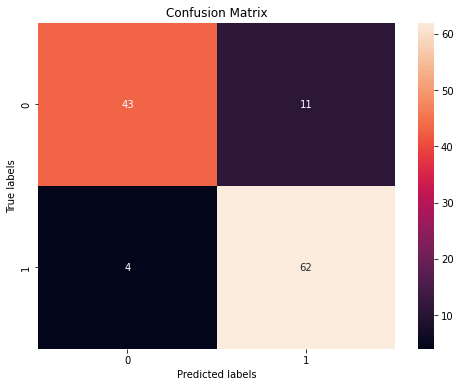

In [190]:
# Plot confusion matrix

from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test,y_hat)

plt.figure(figsize=(8, 6))
sns.heatmap(matrix, annot=True, fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [191]:
rf_model = RandomForestClassifier(max_depth = 30, n_estimators = 150)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Accuracy:",accuracy_score(y_pred_rf,y_test)*100,'%.')
print("Precision:",precision_score(y_pred_rf,y_test)*100,'%.')
print("Recall:",recall_score(y_pred_rf,y_test)*100,'%.')
print("F1_Score:",f1_score(y_pred_rf,y_test)*100,'%.')

Accuracy: 88.33333333333333 %.
Precision: 92.42424242424242 %.
Recall: 87.14285714285714 %.
F1_Score: 89.70588235294117 %.


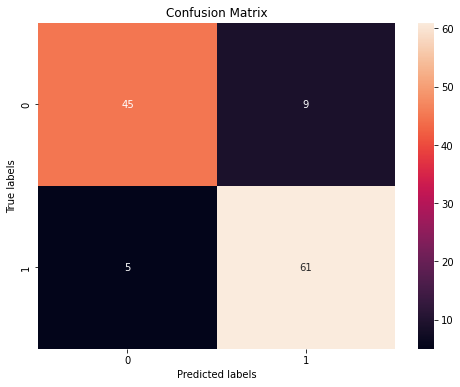

In [192]:
matrix = confusion_matrix(y_test,y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(matrix, annot=True, fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

Both KNeighborsClassifier and RandomForestClassifier models demonstrate good performance with high precision, recall, and F1-measure scores.

We will give preference to RandomForestClassifier, since this algorithm, as a rule, is less susceptible to overfitting and has a good ability to generalize to new data.

In [193]:
def loan_status_predictor(input_array):
    prediction=KNN.predict(input_array.reshape(1,-1))
    if prediction == 0:
        return 'Loan Rejected'
    else:
        return 'Loan Approved'

In [194]:
print(loan_status_predictor(x_test[1].reshape(1,-1)))
print(y_test[1])

Loan Rejected
0
